# Ensemble

In [22]:
import pandas as pd 
import numpy as np 

## Setting Up the Data 

In [23]:
# elstic net 
en_train_test = pd.read_csv('en_20231008_output.csv')
en_upcoming = pd.read_csv('en_20231008_full_predictions.csv')

# linear regression
linreg_train_test = pd.read_csv('linreg_20230810_output.csv')
linreg_upcoming = pd.read_csv('linreg_20230810_full_predictions.csv')

# light gbm
lgbm_train_test = pd.read_csv('lgbm_20230808_output.csv')
lgbm_upcoming = pd.read_csv('lgbm_20230808_full_predictions.csv')

# principal component regression 
pcr_train_test = pd.read_csv('pcr_20231008_output.csv')
pcr_upcoming = pd.read_csv('pcr_20231008_full_predictions.csv')

# train_test 
def key_pred_creator(df,model_name):
    df['KEY'] = df['Team']+'_'+df['Season'].astype(str)
    df.columns = ['Actual',model_name+'_predictions','Team','Season','SUBSET','KEY']
    return df 

en_train_test = key_pred_creator(en_train_test,'en')
linreg_train_test = key_pred_creator(linreg_train_test,'linreg')
lgbm_train_test = key_pred_creator(lgbm_train_test,'lgbm')
pcr_train_test = key_pred_creator(pcr_train_test,'pcr')

train_test = en_train_test.merge(linreg_train_test[['KEY','linreg_predictions']],how='left',on='KEY').merge(lgbm_train_test[['KEY','lgbm_predictions']],how='left',on='KEY').merge(pcr_train_test[['KEY','pcr_predictions']],how='left',on='KEY')

# upcoming 
en_upcoming = en_upcoming[['Team','Predicted Wins']].copy()
linreg_upcoming = linreg_upcoming[['Team','Predicted Wins']].copy()
lgbm_upcoming = lgbm_upcoming[['Team','Predicted Wins']].copy()
pcr_upcoming = pcr_upcoming[['Team','Predicted Wins']].copy()

en_upcoming.columns = ['Team','en_predictions']
linreg_upcoming.columns = ['Team','linreg_predictions']
lgbm_upcoming.columns = ['Team','lgbm_predictions']
pcr_upcoming.columns = ['Team','pcr_predictions']

upcoming = en_upcoming.merge(linreg_upcoming,how='left',on='Team').merge(lgbm_upcoming,how='left',on='Team').merge(pcr_upcoming,how='left',on='Team')

In [24]:
train_test

,Actual,en_predictions,Team,Season,SUBSET,KEY,linreg_predictions,lgbm_predictions,pcr_predictions
0,0.0,-2.363974,Bulls,2001,TRAIN,Bulls_2001,-2.430140,0.0,-2.470251
1,0.0,-1.178817,Grizzlies,2001,TRAIN,Grizzlies_2001,-1.418797,0.0,-1.631518
2,0.0,-0.491301,Warriors,2001,TRAIN,Warriors_2001,-1.163000,0.0,-0.428526
3,0.0,-0.398172,Hawks,2001,TRAIN,Hawks_2001,-0.420292,0.0,0.152849
4,0.0,0.099064,Wizards,2001,TRAIN,Wizards_2001,0.197333,0.0,-0.375637
...,...,...,...,...,...,...,...,...,...
650,11.0,5.431766,Celtics,2022,TEST,Celtics_2022,6.098168,16.0,4.372115
651,16.0,5.529164,Nuggets,2022,TEST,Nuggets_2022,5.767553,10.0,5.626976
652,13.0,5.727737,Heat,2022,TEST,Heat_2022,5.920710,10.0,5.486485
653,1.0,6.296099,Bucks,2022,TEST,Bucks_2022,6.582062,7.0,5.990615


In [25]:
upcoming

,Team,en_predictions,linreg_predictions,lgbm_predictions,pcr_predictions
0,Hornets,-1.182434,-1.350558,0.0,-0.391448
1,Spurs,-0.801945,-1.208438,0.0,-0.774965
2,Pistons,-0.792910,-0.576791,0.0,-0.142186
3,Rockets,-0.773069,-1.743173,0.0,0.074682
4,Thunder,-0.140469,-0.834752,0.0,-0.319234
5,Trail Blazers,0.375379,0.023129,0.0,0.593366
6,Pacers,0.775700,0.416069,0.0,0.775188
7,Wizards,0.865362,0.949770,0.0,1.053691
8,Magic,1.309664,1.194045,0.0,1.651570
9,Jazz,1.747572,2.240234,0.0,2.253973


In [26]:
train = train_test[train_test['SUBSET']=='TRAIN'].copy()
test = train_test[train_test['SUBSET']=='TEST'].copy()
x_train = train.drop(['Actual','Team','Season','KEY','SUBSET'],axis=1)
y_train = train['Actual']
x_test = test.drop(['Actual','Team','Season','KEY','SUBSET'],axis=1)
y_test = test['Actual']

In [27]:
x_train

,en_predictions,linreg_predictions,lgbm_predictions,pcr_predictions
0,-2.363974,-2.430140,0.0,-2.470251
1,-1.178817,-1.418797,0.0,-1.631518
2,-0.491301,-1.163000,0.0,-0.428526
3,-0.398172,-0.420292,0.0,0.152849
4,0.099064,0.197333,0.0,-0.375637
...,...,...,...,...
620,5.432690,5.512650,7.0,5.090668
621,5.685970,5.618615,7.0,5.144881
622,6.116878,6.911727,10.0,5.337362
623,6.503709,6.315585,7.0,5.917072


## Modeling

In [28]:
# basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for feature reduction 
from sklearn import feature_selection
from sklearn import pipeline

# for the modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import sklearn

# getting rid of the warnings 
import warnings
warnings.filterwarnings('ignore')

In [29]:
linreg = LinearRegression()

In [30]:
param_grid = {
                'fit_intercept': [True,False]
            }

clf = GridSearchCV(linreg, 
                           param_grid, 
                           scoring='neg_root_mean_squared_error', 
                           cv = 5,
                           return_train_score=True,
                           verbose = 10, 
                           n_jobs = -1
                  )

In [31]:
# Fitting the model 
clf.fit(x_train,y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Best Score :",clf.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Tuned Hyperparameters : {'fit_intercept': False}
Best Score : -3.5854951950772382


In [32]:
# storing the CV results 
cv = pd.DataFrame(clf.cv_results_)

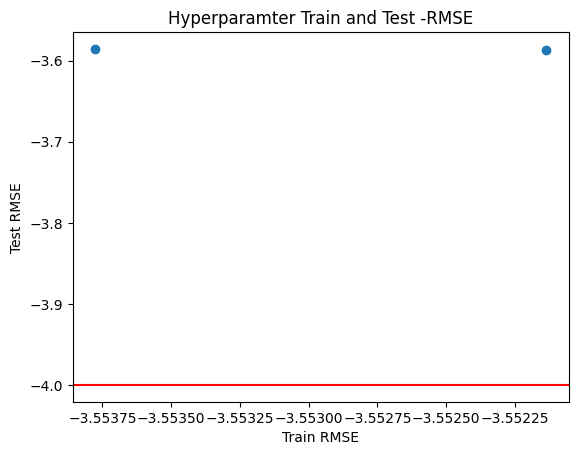

In [33]:
#Plotting the test and train gini to select best parameter
import matplotlib.pyplot as plt
plt.scatter(cv['mean_train_score'],cv['mean_test_score'] )
plt.axhline(0.-4, color='r', linestyle='-')
plt.xlabel('Train RMSE')
plt.ylabel('Test RMSE')
#for i in range(cv.shape[0]):
#    plt.text(x=cv['mean_train_score'][i],y=cv['mean_test_score'][i]+0.03,s=cv['rank_test_score'][i],fontdict=dict(size=5))
plt.title('Hyperparamter Train and Test -RMSE')
plt.show()

In [34]:
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003186,0.000190,0.001279,0.000065,True,{'fit_intercept': True},-3.47685,-3.488686,-3.560136,-3.421812,...,-3.587270,0.205574,2,-3.579299,-3.578203,-3.560010,-3.590667,-3.452502,-3.552136,0.050776
1,0.002809,0.000137,0.001277,0.000055,False,{'fit_intercept': False},-3.47516,-3.492411,-3.563552,-3.424765,...,-3.585495,0.198102,1,-3.581073,-3.578869,-3.560297,-3.591419,-3.457217,-3.553775,0.049311


In [35]:
clf.best_estimator_.get_params()

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}

## Evaluation

### Train 

In [36]:
predictions = clf.predict(x_train)

In [37]:
mse = sklearn.metrics.mean_squared_error(y_train,predictions)
mae = sklearn.metrics.mean_absolute_error(y_train,predictions)
r2 = sklearn.metrics.r2_score(y_train,predictions)
rmse = np.sqrt(mse)

In [38]:
train_output = pd.DataFrame({'Actual':y_train,'Prediction':predictions})
train_output['Team'] = train['Team']
train_output['Season'] = train['Season']
train_output.sort_values(['Season','Prediction'],inplace=True)
metrics_list = ['MSE','MAE','R2','RMSE']
values = [mse,mae,r2,rmse]
train_results = pd.DataFrame({'METRIC':metrics_list,'VALUE':values})
train_results = train_results.transpose().reset_index(drop=True)
train_results.columns = train_results.iloc[0,:]
train_results = train_results.tail(1)

In [39]:
train_output.tail()

,Actual,Prediction,Team,Season
620,7.0,4.835306,Bucks,2021
621,7.0,4.896849,Suns,2021
623,0.0,5.296842,Lakers,2021
624,0.0,5.688964,Nets,2021
622,2.0,6.330514,Jazz,2021


In [40]:
train_results

,MSE,MAE,R2,RMSE
1,12.657281,2.527105,0.322311,3.557707


### Test 

In [41]:
predictions = clf.predict(x_test)

In [42]:
mse = sklearn.metrics.mean_squared_error(y_test,predictions)
mae = sklearn.metrics.mean_absolute_error(y_test,predictions)
r2 = sklearn.metrics.r2_score(y_test,predictions)
rmse = np.sqrt(mse)

In [43]:
test_output = pd.DataFrame({'Actual':y_test,'Prediction':predictions})
test_output['Team'] = test['Team']
test_output['Season'] = test['Season']
test_output.sort_values(['Season','Prediction'],inplace=True)
metrics_list = ['MSE','MAE','R2','RMSE']
values = [mse,mae,r2,rmse]
test_results = pd.DataFrame({'METRIC':metrics_list,'VALUE':values})
test_results = test_results.transpose().reset_index(drop=True)
test_results.columns = test_results.iloc[0,:]
test_results = test_results.tail(1)

In [44]:
test_output.head()

,Actual,Prediction,Team,Season
625,0.0,-1.340407,Thunder,2022
626,0.0,-0.310094,Rockets,2022
627,0.0,-0.206158,Magic,2022
632,0.0,-0.141645,Hornets,2022
628,0.0,-0.127557,Pistons,2022


In [45]:
test_results

,MSE,MAE,R2,RMSE
1,12.398216,2.570792,0.327159,3.52111


### Upcoming Season 

In [46]:
x_up = upcoming[clf.best_estimator_.feature_names_in_]
x_up.head()

,en_predictions,linreg_predictions,lgbm_predictions,pcr_predictions
0,-1.182434,-1.350558,0.0,-0.391448
1,-0.801945,-1.208438,0.0,-0.774965
2,-0.792910,-0.576791,0.0,-0.142186
3,-0.773069,-1.743173,0.0,0.074682
4,-0.140469,-0.834752,0.0,-0.319234


In [47]:
predictions = clf.predict(x_up)
final_output = x_up.copy() 
final_output['Predicted Wins'] = predictions
final_output['Predicted Wins (Rounded)'] = [round(x) for x in predictions]
final_output['Team'] = upcoming['Team']
def rounds(x):
    if x < 4:
        return 'R1/Lottery'
    elif 4<=x<8:
        return 'Second Round'
    elif 8<=x<12: 
        return 'Conf. Finals'
    elif 12<=x<16:
        return 'Finals'
    elif x>=16:
        return 'Champions'
final_output['Round'] = [rounds(x) for x in final_output['Predicted Wins']]
final_output.sort_values('Predicted Wins',inplace=True)
fo = final_output[['Team','Predicted Wins','Predicted Wins (Rounded)','Round']]
fo

,Team,Predicted Wins,Predicted Wins (Rounded),Round
3,Rockets,-0.943379,-1,R1/Lottery
0,Hornets,-0.748138,-1,R1/Lottery
1,Spurs,-0.673631,-1,R1/Lottery
4,Thunder,-0.455048,0,R1/Lottery
2,Pistons,-0.323343,0,R1/Lottery
5,Trail Blazers,0.029238,0,R1/Lottery
6,Pacers,0.249035,0,R1/Lottery
7,Wizards,0.541379,1,R1/Lottery
8,Magic,0.690127,1,R1/Lottery
17,Raptors,1.140931,1,R1/Lottery


In [48]:
len(list(final_output['Team']))

30

In [49]:
ec_teams = ['Hornets',
 'Wizards',
 'Hawks',
 'Pacers',
 'Magic',
 'Pistons',
 'Raptors',
 'Knicks',
 'Bulls',
 'Cavaliers',
 'Nets',
 '76ers',
 'Heat',
 'Celtics',
 'Bucks']
wc_teams = ['Thunder',
 'Rockets',
 'Spurs',
 'Trail Blazers',
 'Kings',
 'Pelicans',
 'Grizzlies',
 'Timberwolves',
 'Jazz',
 'Warriors',
 'Mavericks',
 'Lakers',
 'Clippers',
 'Suns',
 'Nuggets']

In [50]:
ec = fo[fo['Team'].isin(ec_teams)]
wc = fo[fo['Team'].isin(wc_teams)]

In [51]:
print("Bet to Win EC: ")
ecb = ec.sort_values('Predicted Wins').tail(4)
ecb

Bet to Win EC: 


,Team,Predicted Wins,Predicted Wins (Rounded),Round
24,76ers,4.490442,4,Second Round
26,Celtics,5.060404,5,Second Round
29,Bucks,5.657088,6,Second Round
21,Cavaliers,6.133095,6,Second Round


In [52]:
print("Bet to Win WC: ")
wcb = wc.sort_values('Predicted Wins').tail(4)
wcb

Bet to Win WC: 


,Team,Predicted Wins,Predicted Wins (Rounded),Round
22,Clippers,3.947287,4,R1/Lottery
25,Suns,4.527909,5,Second Round
27,Warriors,4.964890,5,Second Round
28,Nuggets,5.325680,5,Second Round


In [53]:
print("Bet to Win NBA Finals: ")
fob = fo.sort_values('Predicted Wins').tail(4)
fob

Bet to Win NBA Finals: 


,Team,Predicted Wins,Predicted Wins (Rounded),Round
26,Celtics,5.060404,5,Second Round
28,Nuggets,5.325680,5,Second Round
29,Bucks,5.657088,6,Second Round
21,Cavaliers,6.133095,6,Second Round


## Writing Info 

In [61]:
train_output['SUBSET'] = 'TRAIN'
test_output['SUBSET'] = 'TEST'
total_output = pd.concat([train_output,test_output])

In [62]:
train_results['SUBSET'] = 'TRAIN'
test_results['SUBSET'] = 'TEST'
total_results = pd.concat([train_results,test_results])
total_results

,MSE,MAE,R2,RMSE,SUBSET
1,12.657281,2.527105,0.322311,3.557707,TRAIN
1,12.398216,2.570792,0.327159,3.52111,TEST


In [63]:
model_name = input()

ensemble_20230810


In [64]:
initial_path = ''
cv_path = initial_path+model_name+'_cv_results.csv'
output_path = initial_path+model_name+'_output.csv'
results_path = initial_path+model_name+'_results.csv'
predictions_path = initial_path+model_name+'_full_predictions.csv'
ec_path = initial_path+model_name+'_ecf_predictions.csv'
wc_path = initial_path+model_name+'_wcf_predictions.csv'
f_path = initial_path+model_name+'_finals_predictions.csv'
print(cv_path)
print(output_path)
print(results_path)
print(predictions_path)
print(ec_path)
print(wc_path)
print(f_path)

ensemble_20230810_cv_results.csv
ensemble_20230810_output.csv
ensemble_20230810_results.csv
ensemble_20230810_full_predictions.csv
ensemble_20230810_ecf_predictions.csv
ensemble_20230810_wcf_predictions.csv
ensemble_20230810_finals_predictions.csv


In [65]:
cv.to_csv(cv_path,index=False)
total_output.to_csv(output_path,index=False)
total_results.to_csv(results_path,index=False)
fo.to_csv(predictions_path,index=False)
ecb.to_csv(ec_path,index=False)
wcb.to_csv(wc_path,index=False)
fob.to_csv(f_path,index=False)

In [66]:
import pickle

# save the model to disk
filename = model_name+'.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

## What if I had Used this Model Last Year? 

In [67]:
ec2 = test_output[test_output['Team'].isin(ec_teams)]
wc2 = test_output[test_output['Team'].isin(wc_teams)]

In [68]:
print("Bet to Win EC: ")
ecb2 = ec2.sort_values('Prediction').tail(4)
ecb2

Bet to Win EC: 


,Actual,Prediction,Team,Season,SUBSET
649,7.0,4.640304,76ers,2022,TEST
653,1.0,5.437795,Bucks,2022,TEST
652,13.0,5.796965,Heat,2022,TEST
650,11.0,7.329000,Celtics,2022,TEST


In [69]:
print("Bet to Win WC: ")
wcb2 = wc2.sort_values('Prediction').tail(4)
wcb2

Bet to Win WC: 


,Actual,Prediction,Team,Season,SUBSET
648,0.0,4.322993,Mavericks,2022,TEST
647,6.0,4.421702,Warriors,2022,TEST
654,6.0,5.581911,Suns,2022,TEST
651,16.0,5.714663,Nuggets,2022,TEST


In [70]:
print("Bet to Win NBA Finals: ")
fob2 = test_output.sort_values('Prediction').tail(4)
fob2

Bet to Win NBA Finals: 


,Actual,Prediction,Team,Season,SUBSET
654,6.0,5.581911,Suns,2022,TEST
651,16.0,5.714663,Nuggets,2022,TEST
652,13.0,5.796965,Heat,2022,TEST
650,11.0,7.329000,Celtics,2022,TEST


## Feature Importance

In [10]:
import pandas as pd 
import numpy as np 

In [16]:
model_name = 'ensemble_20230810'

In [18]:
import pickle

# save the model to disk
filename = model_name+'.sav'
#pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [57]:
for i in range(0,4):
    coefficients = list(loaded_model.best_estimator_.coef_)
    names = list(loaded_model.best_estimator_.feature_names_in_)
    print("{}: {}".format(names[i],coefficients[i]))

en_predictions: 0.01494931169390232
linreg_predictions: 0.5353671684887229
lgbm_predictions: 0.24376197910859787
pcr_predictions: 0.01894937826568471
